# fbprophet

[fbprophet](https://github.com/facebookincubator/prophet) is an opiniated time serier prediction library. Its syntax is compatible with [scikit-learn](https://github.com/scikit-learn/scikit-learn).

I will try to predict the future notional volume of [SPY](https://www.google.com/finance?q=SPY) ETF below.

One good getting started notebook for fbprophet is in their repo - [link here](https://github.com/facebookincubator/prophet/blob/master/notebooks/quick_start.ipynb)

In [1]:
%matplotlib inline
from fbprophet import Prophet

import pandas as pd

# Read the SPY_notional.csv file
# Prophet expects the days/time to be in the 'ds' column and the values in the 'y' column.
df = pd.read_csv('SPY_notional.csv')
df = df.rename(columns={'Unnamed: 0': 'ds', 'SPY': 'y'})
df.head()

# Capping to the last 600 days because I don't have reliable accurrate data for some days.
df = df.tail(600)

## Create a prophet model

We will use the [logistic growth model](https://github.com/facebookincubator/prophet/blob/master/python/stan/prophet_logistic_growth.stan).
It requires us to have the `cap` column.

In [2]:
df['cap'] = 3.5 * 1e10
m = Prophet(growth='logistic')
m = Prophet()
m.fit(df)

## Predict the next 60 days

In [3]:
future = m.make_future_dataframe(periods=60)
future.tail()

future['cap'] = 3.5 * 1e10
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
655,2017-02-24,1.688275e+10,6.821787e+09,2.746666e+10
656,2017-02-25,1.635101e+10,6.611808e+09,2.613557e+10
657,2017-02-26,1.670881e+10,6.655817e+09,2.621406e+10
658,2017-02-27,1.343811e+10,4.639862e+09,2.338672e+10
659,2017-02-28,1.494641e+10,5.169575e+09,2.430530e+10


## Plot the predictions

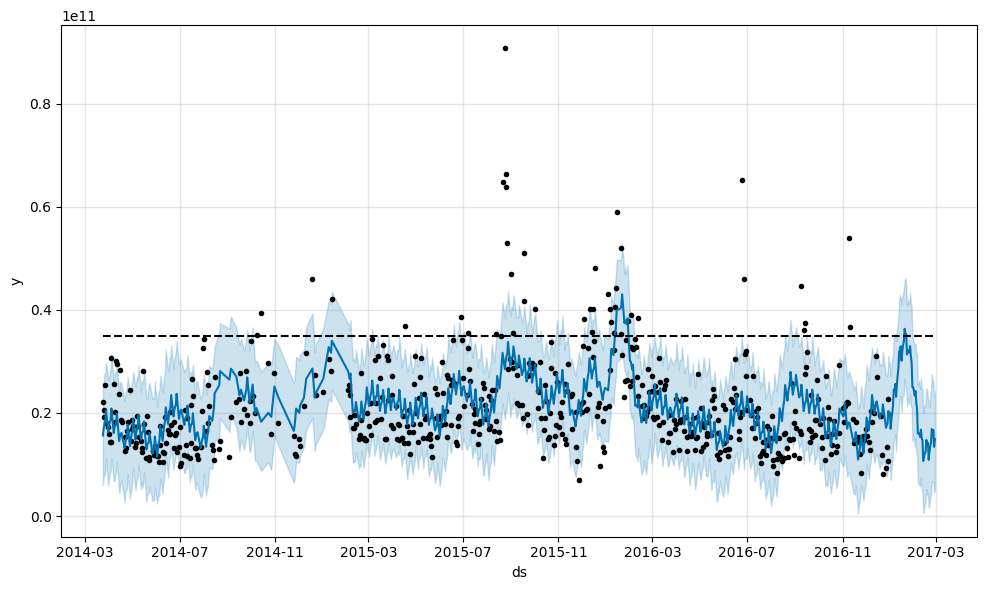

In [4]:
m.plot(forecast);

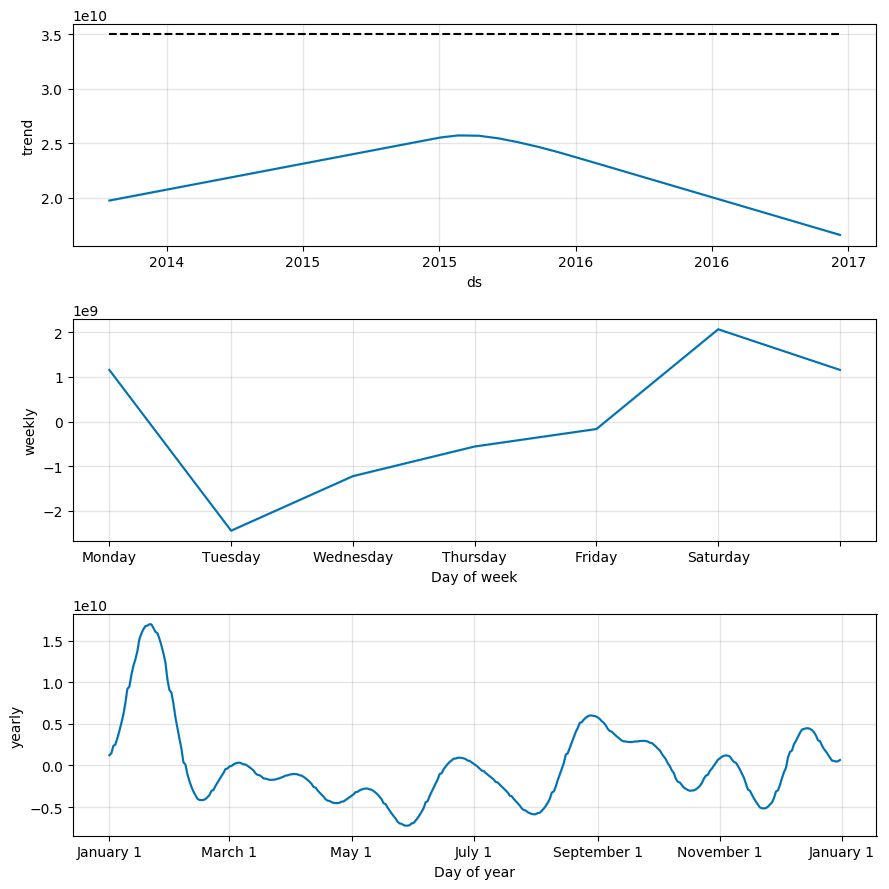

In [5]:
m.plot_components(forecast);

## Conclusion

We can see the prediction is highly skewed in January because the last January was really volatile (China stock market effects!). We would need more data to smooth out this 'wrong' seasionality bias.